In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from IPython.html.widgets import interact
%matplotlib inline

In [3]:
plt.style.use("ggplot")

In [4]:
df = pd.read_excel("./data/spectrum.xlsx", header=None)

In [5]:
df.head()

,0,1
0,349.0,-2.9678
1,349.1,1.7821
2,349.2,0.9071
3,349.3,0.7821
4,349.4,0.7196


In [6]:
df2 = df.rename(columns={0:"lambda",1:"Intensity"})

In [7]:
df2.head()

,lambda,Intensity
0,349.0,-2.9678
1,349.1,1.7821
2,349.2,0.9071
3,349.3,0.7821
4,349.4,0.7196


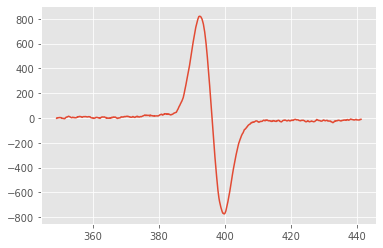

In [9]:
plt.plot(df2["lambda"], df2["Intensity"])

In [11]:
y_int = integrate.cumtrapz(df2["Intensity"],df2["lambda"],initial=0)

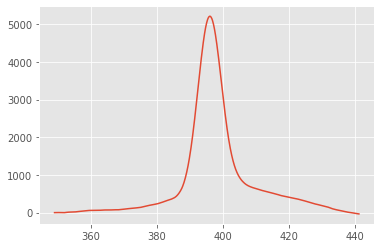

In [12]:
plt.plot(df2["lambda"], y_int)

#$y-e^{-\frac{(x-x_{0})^2}{2\sigma^2}}$

In [20]:
@interact(Intensity=(0,800,3),x0=(360,420,0.5), sigma=(0,5,0.5))
def animation(Intensity, x0, sigma):
    plt.plot(df2["lambda"],df2["Intensity"])
    x=df2["lambda"]
    y=Intensity * (x0 - x) * np.exp(-0.5 * (x0 - x) ** 2/ sigma ** 2)
    plt.plot(x,y)
    plt.show()

interactive(children=(IntSlider(value=399, description='Intensity', max=800, step=3), FloatSlider(value=390.0,…

In [29]:
x = np.arange(150,440,0.001)
x0 = 396.0
Intensity = 399
sigma = 3.50
y = Intensity * (x0 - x) * np.exp(-0.5 *(x0 -x)** 2/sigma **2)

In [30]:
y_int2 = integrate.cumtrapz(y,x,initial=0)

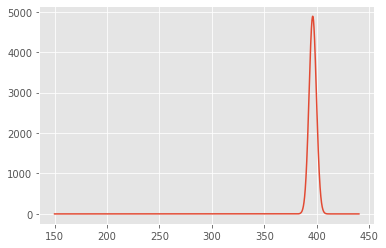

In [31]:
plt.plot(x,y_int2)

In [27]:
y_int3 = integrate.cumtrapz(y_int2,x,initial=0)

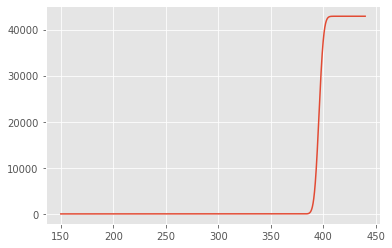

In [28]:
plt.plot(x,y_int3)